# SAPSO library - a demonstration

This library allows to easily run SA and PSO experiments while providing convenient 2D plotting functions.
Cells below demonstrate a possible workflow.

In [1]:
import numpy as np

import sapso

from sapso.sa import SimulatedAnnealing
from sapso.pso import ParticleSwarmOptimization
from sapso.plot import contour_plot
from sapso.test import Ackley, Sphere, Beale, Himmelblau, Eggholder

## Demo: Simulated Annealing

In [ ]:
# select 2D test function
tfunc_sa = Ackley()

# default params
kwargs_sa = {
    'iterations'  : 1000,
    'seed'        : 42,
    'temperature' : None,  # uses default cooling scheme
    'step_size'   : 0.1,   # make steps of size 1% of area width
    'goal'        : 'min'  # 'min'/'max' for minimization/maximization
}

# instantiate SA manager class
SA = SimulatedAnnealing(tfunc_sa.objective, tfunc_sa.area, **kwargs_sa)

# optimize by simulated annealing
history_sa = SA.optimize()

# quickly print most important results
sapso.utils.print_results(history_sa, tfunc_sa)


In [ ]:
# examine history dict of simulated_annealing()
print(f"history.keys()  : {list(history_sa.keys())}")

# examine meta information of history dict
print(f"* meta.keys()   : {list(history_sa['meta'].keys())}")
print(f"* params.keys() : {list(history_sa['meta']['params'].keys())}")

## Demo: Particle Swarm Optimization

In [ ]:
# select 2D test function
tfunc_pso = Himmelblau()

# default params
kwargs_pso = {
    'iterations'  : 1000,
    'seed'        : 42,
    'n_particles' : 100, 
    'w'           : 0.75,  # inertia weight, in [0,1)
    'a_ind'       : 1.0,   # attraction individual best, typically in [1,3]
    'a_neigh'     : 1.6,   # attraction neighbour best, typically in [1,3]
    'goal'        : 'min'  # 'min'/'max' for minimization/maximization
}

# instantiate PSO manager class
PSO = ParticleSwarmOptimization(tfunc_pso.objective, tfunc_pso.area, **kwargs_pso)

# optimize by simulated annealing
history_pso = PSO.optimize()

# quickly print most important results
sapso.utils.print_results(history_pso, tfunc_pso)


In [ ]:
# examine history dict of particle_swarm_optimization()
print(f"history.keys()  : {list(history_pso.keys())}")

# examine meta information of history dict
print(f"* meta.keys()   : {list(history_pso['meta'].keys())}")
print(f"* params.keys() : {list(history_pso['meta']['params'].keys())}")

## Demo: Plotting Results

### Example: Single Plot

In [ ]:
contour_plot(history_sa, tfunc_sa, title='')
contour_plot(history_pso, tfunc_pso, title='')

### Example: multiple plots

In [ ]:
test_funcs = [
    sapso.test.Ackley(),
    sapso.test.Himmelblau(),
    sapso.test.Beale(),
    sapso.test.Eggholder(),
    sapso.test.SchaffnerNo2(),
    sapso.test.SchaffnerNo4(),
]

methods = [
    'SA',
    'PSO',
]

kwargs_sa = {
    'iterations'  : 100,
    'seed'        : 42,
    'temperature' : None,  # uses default cooling scheme
    'step_size'   : 0.1,   # steps of size step_size percentage of smallest length of hyper cube area
    'goal'        : 'min'  # 'min'/'max' for minimization/maximization
}

kwargs_pso = {
    'iterations'  : 100,
    'seed'        : 43,
    'n_particles' : 10, 
    'w'           : 0.75,  # inertia weight, in [0,1)
    'a_ind'       : 1.0,   # attraction individual best, typically in [1,3]
    'a_neigh'     : 1.6,   # attraction neighbour best, typically in [1,3]
    'goal'        : 'min'  # 'min'/'max' for minimization/maximization
}

kwargs_method = [
    kwargs_sa,
    kwargs_pso,
]


kwargs_plot = {
    'resolution'   : 100,
    'cmap_bg'      : 'bone',     # cmap for background
    'cmap_fg'      : 'Accent',   # cmap for traces of PSO plots
    'title'        : None,       # don't set title
    #'title'        : '',        # automatically set title
    'title_length' : 'short',    # title ignored if title is ''
}

sapso.plot.comparison_plot(test_funcs, methods, kwargs_method, kwargs_plot)

In [2]:
# select 2D test function
tfunc_pso = Eggholder()

# default params
kwargs_pso = {
    'iterations'  : 100,
    'seed'        : 43,
    'n_particles' : 10, 
    'w'           : 0.75,  # inertia weight, in [0,1)
    'a_ind'       : 1.0,   # attraction individual best, typically in [1,3]
    'a_neigh'     : 1.6,   # attraction neighbour best, typically in [1,3]
    'goal'        : 'min'  # 'min'/'max' for minimization/maximization
}

# instantiate PSO manager class
PSO = ParticleSwarmOptimization(tfunc_pso.objective, tfunc_pso.area, **kwargs_pso)

# optimize by simulated annealing
history_pso = PSO.optimize()

# quickly print most important results
sapso.utils.print_results(history_pso, tfunc_pso)

optimum - PSO @ Eggholder:

* found    : pos: [356.37475432 512.        ]
           : val: -858.6009957742081

* expected : pos: [512.     404.2319]
           : val: -959.6407


[[-512.  512.]
 [-512.  512.]]
np.min(X) =  -512.0
np.max(X) =  512.0
np.min(Y) =  -512.0
np.max(Y) =  512.0
particle =  0
any(points >  512) =  False
any(points < -512) =  False
(points >  512) =  []
(points < -512) =  []
particle =  4
any(points >  512) =  False
any(points < -512) =  False
(points >  512) =  []
(points < -512) =  []
particle =  9
any(points >  512) =  False
any(points < -512) =  False
(points >  512) =  []
(points < -512) =  []


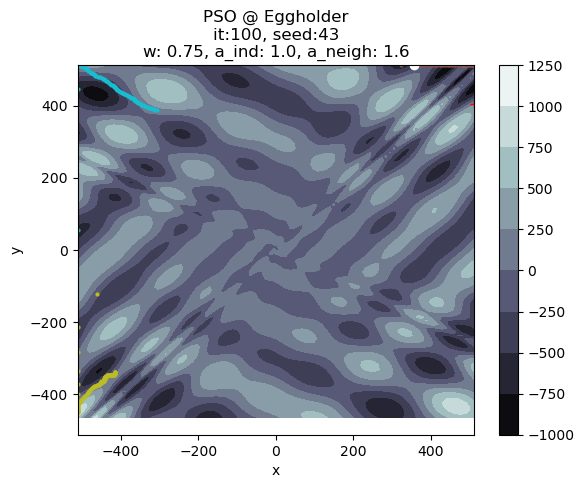

In [3]:
# plot results
contour_plot(history_pso, tfunc_pso, title='')